Для начала объединим ответы респондентов "турецкий барабан" и "шоколадина" в один: добавим в данные столбец `pickle`.

In [55]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
library(tidyverse)
library(corrplot)

corrplot 0.95 loaded



In [14]:
soc <- read_csv("https://raw.githubusercontent.com/olesar/2023dav4compling/main/data/socling.csv",
show_col_types = FALSE)
str(soc)
unique(soc$phrase)

spc_tbl_ [63 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X         : num [1:63] 1 2 3 4 5 6 7 8 9 10 ...
 $ id        : num [1:63] 9 1 3 7 3 8 8 8 10 7 ...
 $ region    : chr [1:63] "Moscow" "Moscow" "Moscow" "Moscow" ...
 $ fdistrict : chr [1:63] "Central" "Central" "Central" "Central" ...
 $ sex       : chr [1:63] "male" "female" "female" "male" ...
 $ phrase    : chr [1:63] "соленый огурец" "соленый огурец" "соленый огурец" "соленый огурец" ...
 $ phrase.tr : chr [1:63] "solenyj ogurec" "solenyj ogurec" "solenyj ogurec" "solenyj ogurec" ...
 $ phrase.eng: chr [1:63] "pickle" "pickle" "pickle" "pickle" ...
 - attr(*, "spec")=
  .. cols(
  ..   X = col_double(),
  ..   id = col_double(),
  ..   region = col_character(),
  ..   fdistrict = col_character(),
  ..   sex = col_character(),
  ..   phrase = col_character(),
  ..   phrase.tr = col_character(),
  ..   phrase.eng = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] "соленый огурец"   "турецкий барабан" "шоколадина"

In [23]:
# строки в факторы
soc %>% mutate_if(is.character, factor) -> soc
soc_new <- soc %>%
  mutate(pickle=factor(ifelse(phrase == "турецкий барабан" | phrase == "шоколадина", 0, 1)))
head(soc_new)

X,id,region,fdistrict,sex,phrase,phrase.tr,phrase.eng,pickle
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,9,Moscow,Central,male,соленый огурец,solenyj ogurec,pickle,1
2,1,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle,1
3,3,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle,1
4,7,Moscow,Central,male,соленый огурец,solenyj ogurec,pickle,1
5,3,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle,1
6,8,Moscow,Central,male,соленый огурец,solenyj ogurec,pickle,1


Исследуйте (не)зависимость выбора продолжения дразнилки от пола (переменная `sex`). Сформулируйте нулевую гипотезу и примените необходимый тест (не забывая проверить допущения!). Сформулируйте статистический вывод и содержательную интерпретацию.  

- `Нулевая гипотеза:`

Выбор фразы (огурец/не огурец) в генеральной совокупности не зависит от пола говорящего.

- `Альтернативная гипотеза:`

Выбор фразы (огурец/не огурец) в генеральной совокупности зависит от пола говорящего.

**Допущения хи-квадрата:**

- Исследуемые переменные являются категориальными **(да)**
- Данные в таблице сопряженности представляют количество наблюдений (не проценты) **(да)**
- Ожидаемые значения во всех ячейках (варианты: почти все, 80% ячеек) содержат более 5 наблюдений **(да)**
- Каждое наблюдение вносит свой вклад только в одну группу (независимость) **(да)**
- Группы независимы **(да)**
- Выборка, предположительно, достаточно случайна **(да)**

In [25]:
# таблица сопряженности
soc_tab <- soc %>%
  select(phrase, sex) %>%
  table()
soc_tab

                  sex
phrase             female male
  соленый огурец       24   23
  турецкий барабан      9    1
  шоколадина            1    5

In [27]:
# тест хи-квадрат
soc.chisq <- chisq.test(soc_tab)
soc.chisq

Warning message in chisq.test(soc_tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  soc_tab
X-squared = 8.7462, df = 2, p-value = 0.01261


**Содержательная интерпретация**

Чтобы проверить гипотезу о том, влияет ли фактор пола на выбор фразы в поговорке, был проведент тест хи-квадрат. Результаты показали, что фактор пола не играет значимой разницы (X-squared = 8.7462, df = 2, p-value = 0.01261).

### Данные: выбор суффикса прилагательного в испанском языке  

Данные из статьи Антонио Фабрегаса (Fábregas 2015)[https://doi.org/10.18710/GSI6B4] документируют выбор алломорфа адъективного суффикса _-ivo_ (_admirativo_ vs. _agresivo_) в зависимости от формальных и содержательных факторов. Важные для нас переменные:   
* `Last_consonant` перед _-ivo_ -- `t` или `s`
* `Theme_vowel`	-- наличие/отсутствие тематической гласной из спряжения глагола перед суффиксом   
Другие переменные:  
* `Adjective`	-- прилагательное  
* `Base_verb`	-- исходный глагол  
* `Demotivation` -- композициональное значение (N) vs. демотивированное значение (Y, не связанное с современным значением глагола)
* `Allomorphy` -- представлены ли в прилагательном регулярная основа спряжения глагола (R) или алломорф, не представленный в финитных формах (I)
* `Meaning`	-- активное значение (A), пассивное значение (P), NA (N, для демотивированных значений)  
* `Possible_nominal_base` -- возможная именная основа: приводится основа или N (нет основы)  

### Упражнение 2

Исследуйте (не)зависимость двух переменных: согласной перед суффиксом _-ivo_ (`Last_consonant`) и наличия тематической гласной (`Theme_vowel`). Сформулируйте нулевую гипотезу и примените необходимый тест (не забывая проверить допущения!). Сформулируйте статистический вывод и содержательную интерпретацию.  


- `Нулевая гипотеза:`

Вариация согласных перед суффиксом -ivo не зависит от наличия тематической гласной.

- `Альтернативная гипотеза:`

Вариация согласных перед суффиксом -ivo зависит от наличия тематической гласной.

**Допущения хи-квадрата:**

- Исследуемые переменные являются категориальными **(да)**
- Данные в таблице сопряженности представляют количество наблюдений (не проценты) **(да)**
- Ожидаемые значения во всех ячейках (варианты: почти все, 80% ячеек) содержат более 5 наблюдений **(да)**
- Каждое наблюдение вносит свой вклад только в одну группу (независимость) **(да)**
- Группы независимы **(да)**
- Выборка, предположительно, достаточно случайна **(да)**

In [38]:
ivo_dataset <- read_csv("https://raw.githubusercontent.com/olesar/2023dav4compling/main/data/spanish_tivo.csv",
show_col_types=FALSE)
ivo_dataset <- ivo_dataset %>%
    mutate_all(factor)
ivo_set <- ivo_dataset %>%
  select(Last_consonant, Theme_vowel) %>%
  mutate_all(factor)

In [34]:
ivo_set_tab <- ivo_set %>%
  table()
ivo_set_tab

              Theme_vowel
Last_consonant  no yes
             s  45   0
             t  57 245

In [35]:
# тест хи-квадрат
ivo_set.chisq <- chisq.test(ivo_set_tab)
ivo_set.chisq


	Pearson's Chi-squared test with Yates' continuity correction

data:  ivo_set_tab
X-squared = 120.32, df = 1, p-value < 2.2e-16


**Содержательная интерпретация**

Чтобы проверить гипотезу о том, есть ли связь между наличием тематической гласной и выбором последнего согласного, был проведет тест хи-квадрат. Он показал, что существует статистически значимая связь между этими двумя факторами (X-squared = 120.32, df = 1, p-value < 2.2e-16).

### Упражнение 3  

На данных о выборе алломорфа адъективного суффикса _-ivo_ исследуйте связь между переменными `Last_consonant` и `Allomorphy`. Последняя указывает на то, используется ли в прилагательном алломорф основы, представленный в финитных формах глагола или другой нерегулярный алломорф.  

In [41]:
ivo_all <- ivo_dataset %>%
  select(Last_consonant, Allomorphy)

ivo_all_tab <- ivo_all %>% table()
ivo_all_tab

              Allomorphy
Last_consonant   I   R
             s  35  10
             t  43 259

In [42]:
# тест хи-квадрат
ivo_set.chisq <- chisq.test(ivo_all_tab)
ivo_set.chisq


	Pearson's Chi-squared test with Yates' continuity correction

data:  ivo_all_tab
X-squared = 87.128, df = 1, p-value < 2.2e-16


### Упражнение 4  
Выше был дан пример визуализации для таблицы сопряженности из датасета "Жадина-говядина". Визуализируйте связь между значениями переменных другими способами.

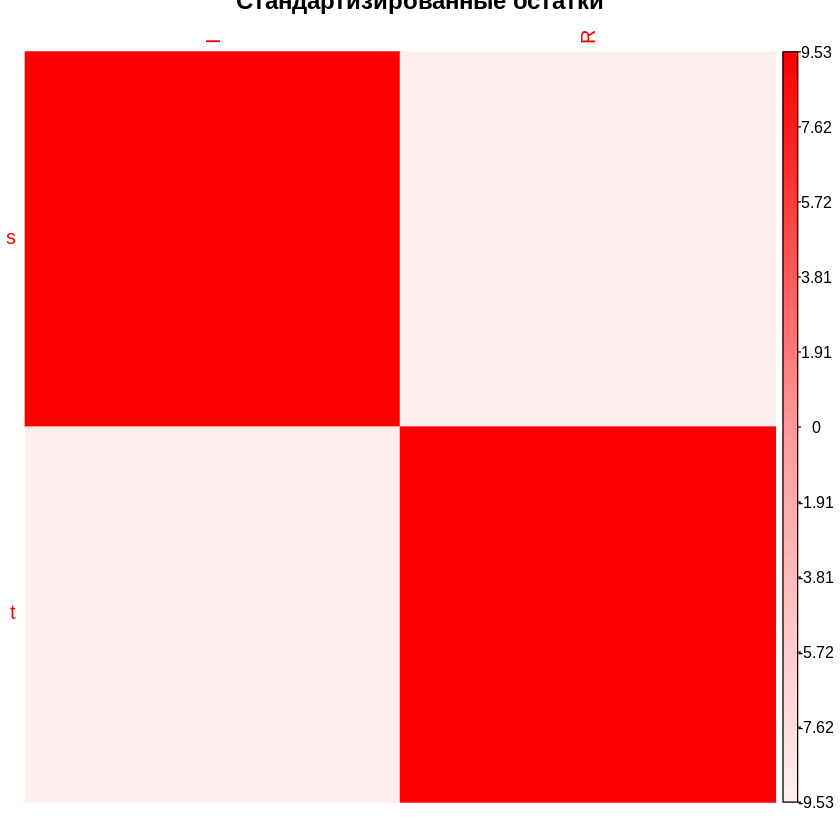

In [64]:
corrplot(ivo_set.chisq$stdres,
         method = "color",
         is.corr = FALSE,
         title = "Стандартизированные остатки",
         col = colorRampPalette(c("#FFEEEE", "#FF9999", "#FF0000"))(100),
         bg = "white")